In [ ]:
import pandas as pd
import numpy as np
import plotly
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.ensemble import RandomForestRegressor
import matplotlib.pyplot as plt
import shap

In [ ]:
#HVOE Alone

hvoe = pd.read_csv('data/HVOE Shapley.csv')

hvoe

,Care,Cost,Service,Professional,Friendly,Technician,Veterinarian,Receptionist,Average,Clinic
0,5.000000,1.000000,5.00000,5.000000,5.0,5.0,1,5.000000,4.000000,HVOE
1,5.000000,5.000000,5.00000,5.000000,5.0,5.0,5,5.000000,5.000000,HVOE
2,5.000000,5.000000,5.00000,5.000000,5.0,5.0,5,5.000000,5.000000,HVOE
3,1.000000,1.000000,5.00000,5.000000,5.0,5.0,5,5.000000,4.000000,HVOE
4,5.000000,5.000000,5.00000,5.000000,5.0,5.0,5,5.000000,5.000000,HVOE
5,5.000000,1.000000,5.00000,5.000000,5.0,5.0,5,5.000000,4.500000,HVOE
6,5.000000,1.000000,5.00000,5.000000,5.0,5.0,5,5.000000,4.500000,HVOE
7,5.000000,2.714286,1.00000,1.000000,5.0,5.0,5,5.000000,3.714286,HVOE
8,5.000000,2.714286,5.00000,5.000000,5.0,5.0,5,2.000000,4.339286,HVOE
9,5.000000,2.714286,5.00000,5.000000,5.0,5.0,5,4.666667,4.672619,HVOE


In [ ]:
hvoe_Y = hvoe['Average']
hvoe_X =  hvoe[['Care', 'Cost', 'Service', 'Professional',
       'Friendly', 'Technician', 'Veterinarian', 'Receptionist']]

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(hvoe_X, hvoe_Y, test_size = 0.3)

In [ ]:
model_hvoe = RandomForestRegressor()
model_hvoe.fit(X_train, Y_train)  
print(model_hvoe.feature_importances_)

[0.10551602 0.26214962 0.11735381 0.11164734 0.         0.
 0.35589807 0.04743513]


In [ ]:
shap_values_hvoe = shap.TreeExplainer(model_hvoe).shap_values(X_train)

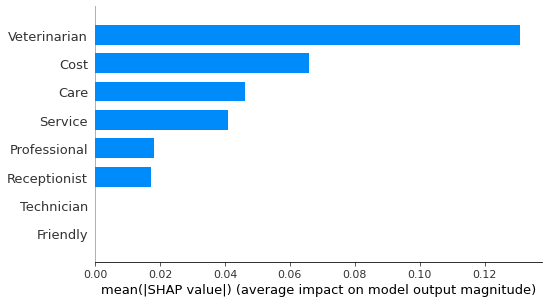

In [ ]:
shap.summary_plot(shap_values_hvoe, X_train, plot_type="bar")

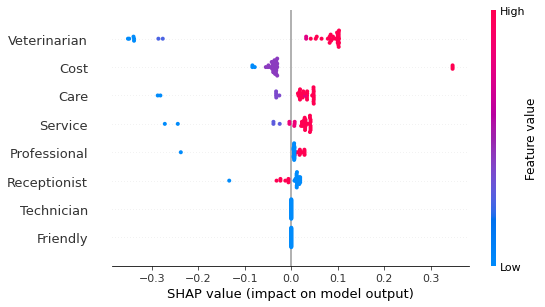

In [ ]:
shap.summary_plot(shap_values_hvoe, X_train)

In [ ]:
#Combined Dataframe

combined = pd.read_csv('data/Combined Shapley.csv')
combined

,Care,Cost,Service,Professional,Friendly,Technician,Veterinarian,Receptionist,Average Rating
0,5.000,1.00,5.0,5.0,5.0000,5.0,1.00,5.000000,4.000000
1,5.000,5.00,5.0,5.0,5.0000,5.0,5.00,5.000000,5.000000
2,5.000,5.00,5.0,5.0,5.0000,5.0,5.00,5.000000,5.000000
3,1.000,1.00,5.0,5.0,5.0000,5.0,5.00,5.000000,4.000000
4,5.000,5.00,5.0,5.0,5.0000,5.0,5.00,5.000000,5.000000
...,...,...,...,...,...,...,...,...,...
272,4.875,1.25,5.0,5.0,4.8125,5.0,5.00,4.333333,4.408854
273,4.875,1.25,5.0,5.0,4.8125,5.0,5.00,4.333333,4.408854
274,4.875,1.25,1.0,5.0,4.8125,5.0,5.00,4.333333,3.908854
275,4.875,1.25,5.0,5.0,4.8125,5.0,4.64,4.333333,4.363854


In [ ]:
combined_Y = combined['Average Rating']
combined_X =  combined[['Care', 'Cost', 'Service', 'Professional',
       'Friendly', 'Technician', 'Veterinarian', 'Receptionist']]

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(combined_X, combined_Y, test_size = 0.3)

In [ ]:
model_combined = RandomForestRegressor()
model_combined.fit(X_train, Y_train)  
print(model_combined.feature_importances_)

[0.10323125 0.06488869 0.08163769 0.02606465 0.03125256 0.17550297
 0.32974899 0.1876732 ]


In [ ]:
shap_values_combined = shap.TreeExplainer(model_combined).shap_values(X_train)

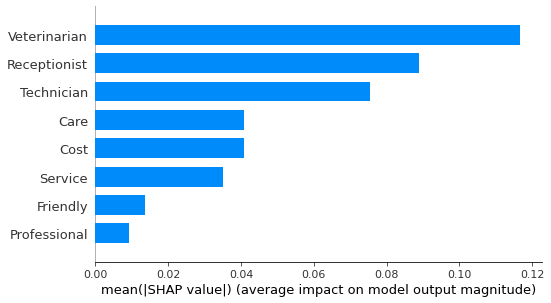

In [ ]:
shap.summary_plot(shap_values_combined, X_train, plot_type="bar")

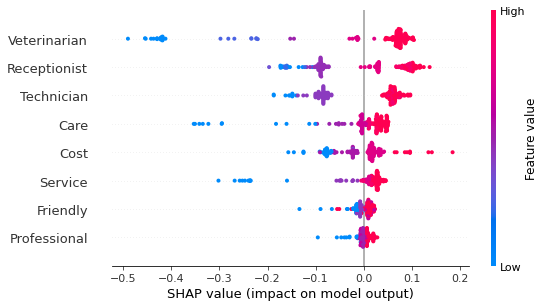

In [ ]:
shap.summary_plot(shap_values_combined, X_train)